In [27]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Modeling_and_Society

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Modeling_and_Society


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
energy_data = pd.read_csv('energy_dataset.csv.txt')
energy_data

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [30]:
print(energy_data.info())
print(energy_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [31]:
energy_data.nunique()

time                                           35064
generation biomass                               423
generation fossil brown coal/lignite             956
generation fossil coal-derived gas                 1
generation fossil gas                           8297
generation fossil hard coal                     7266
generation fossil oil                            321
generation fossil oil shale                        1
generation fossil peat                             1
generation geothermal                              1
generation hydro pumped storage aggregated         0
generation hydro pumped storage consumption     3311
generation hydro run-of-river and poundage      1684
generation hydro water reservoir                7029
generation marine                                  1
generation nuclear                              2388
generation other                                 103
generation other renewable                        78
generation solar                              

In [32]:
energy_data.duplicated().value_counts()

False    35064
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7e2c7b5a2c20>,
 'caps': [<matplotlib.lines.Line2D at 0x7e2c7b5a3160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e2c7b5a2980>],
 'medians': [<matplotlib.lines.Line2D at 0x7e2c7b5a36a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e2c7b5a3a90>],
 'means': []}

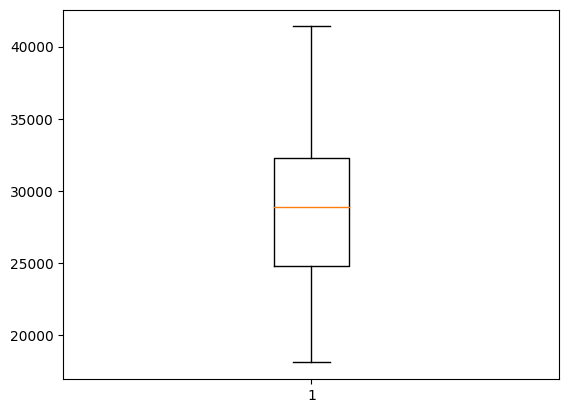

In [33]:
#using boxplots to look for outliers - none for this column
plt.boxplot(energy_data["total load forecast"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e2c7b430b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7e2c7b431090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e2c7b4308b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e2c7b4315d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e2c7b431870>],
 'means': []}

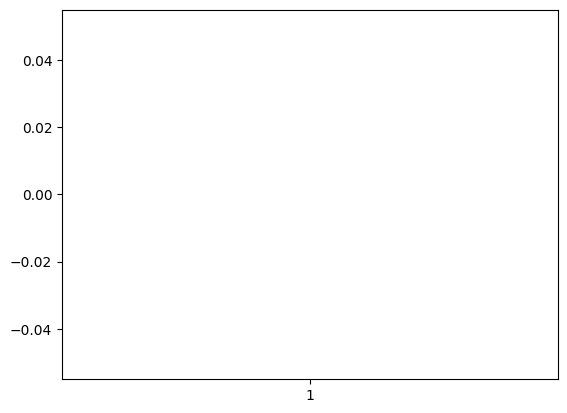

In [34]:
plt.boxplot(energy_data["total load actual"]) #need to investigate whats going on here

{'whiskers': [<matplotlib.lines.Line2D at 0x7e2c7b485900>,
 'caps': [<matplotlib.lines.Line2D at 0x7e2c7b485e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e2c7b485660>],
 'medians': [<matplotlib.lines.Line2D at 0x7e2c7b486380>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e2c7b486620>],
 'means': []}

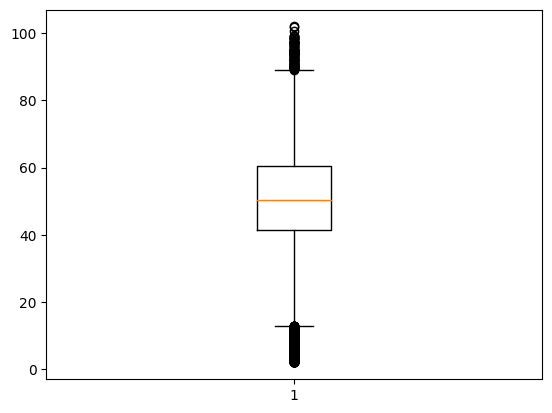

In [35]:
plt.boxplot(energy_data["price day ahead"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e2c8112a4a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e2c7b098790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e2c8112b550>],
 'medians': [<matplotlib.lines.Line2D at 0x7e2c7b098d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e2c7b0991b0>],
 'means': []}

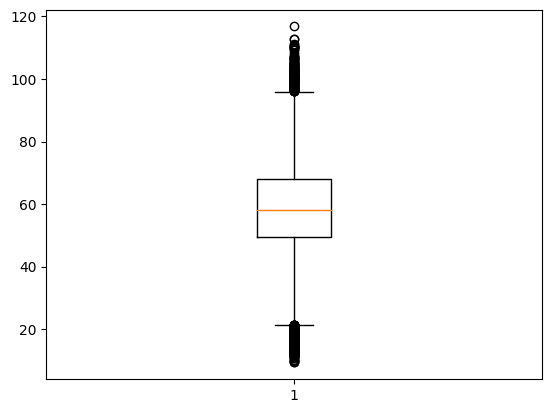

In [36]:
plt.boxplot(energy_data["price actual"])

<ipython-input-37-8013b65f5dea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat = energy_data.corr()


<Axes: >

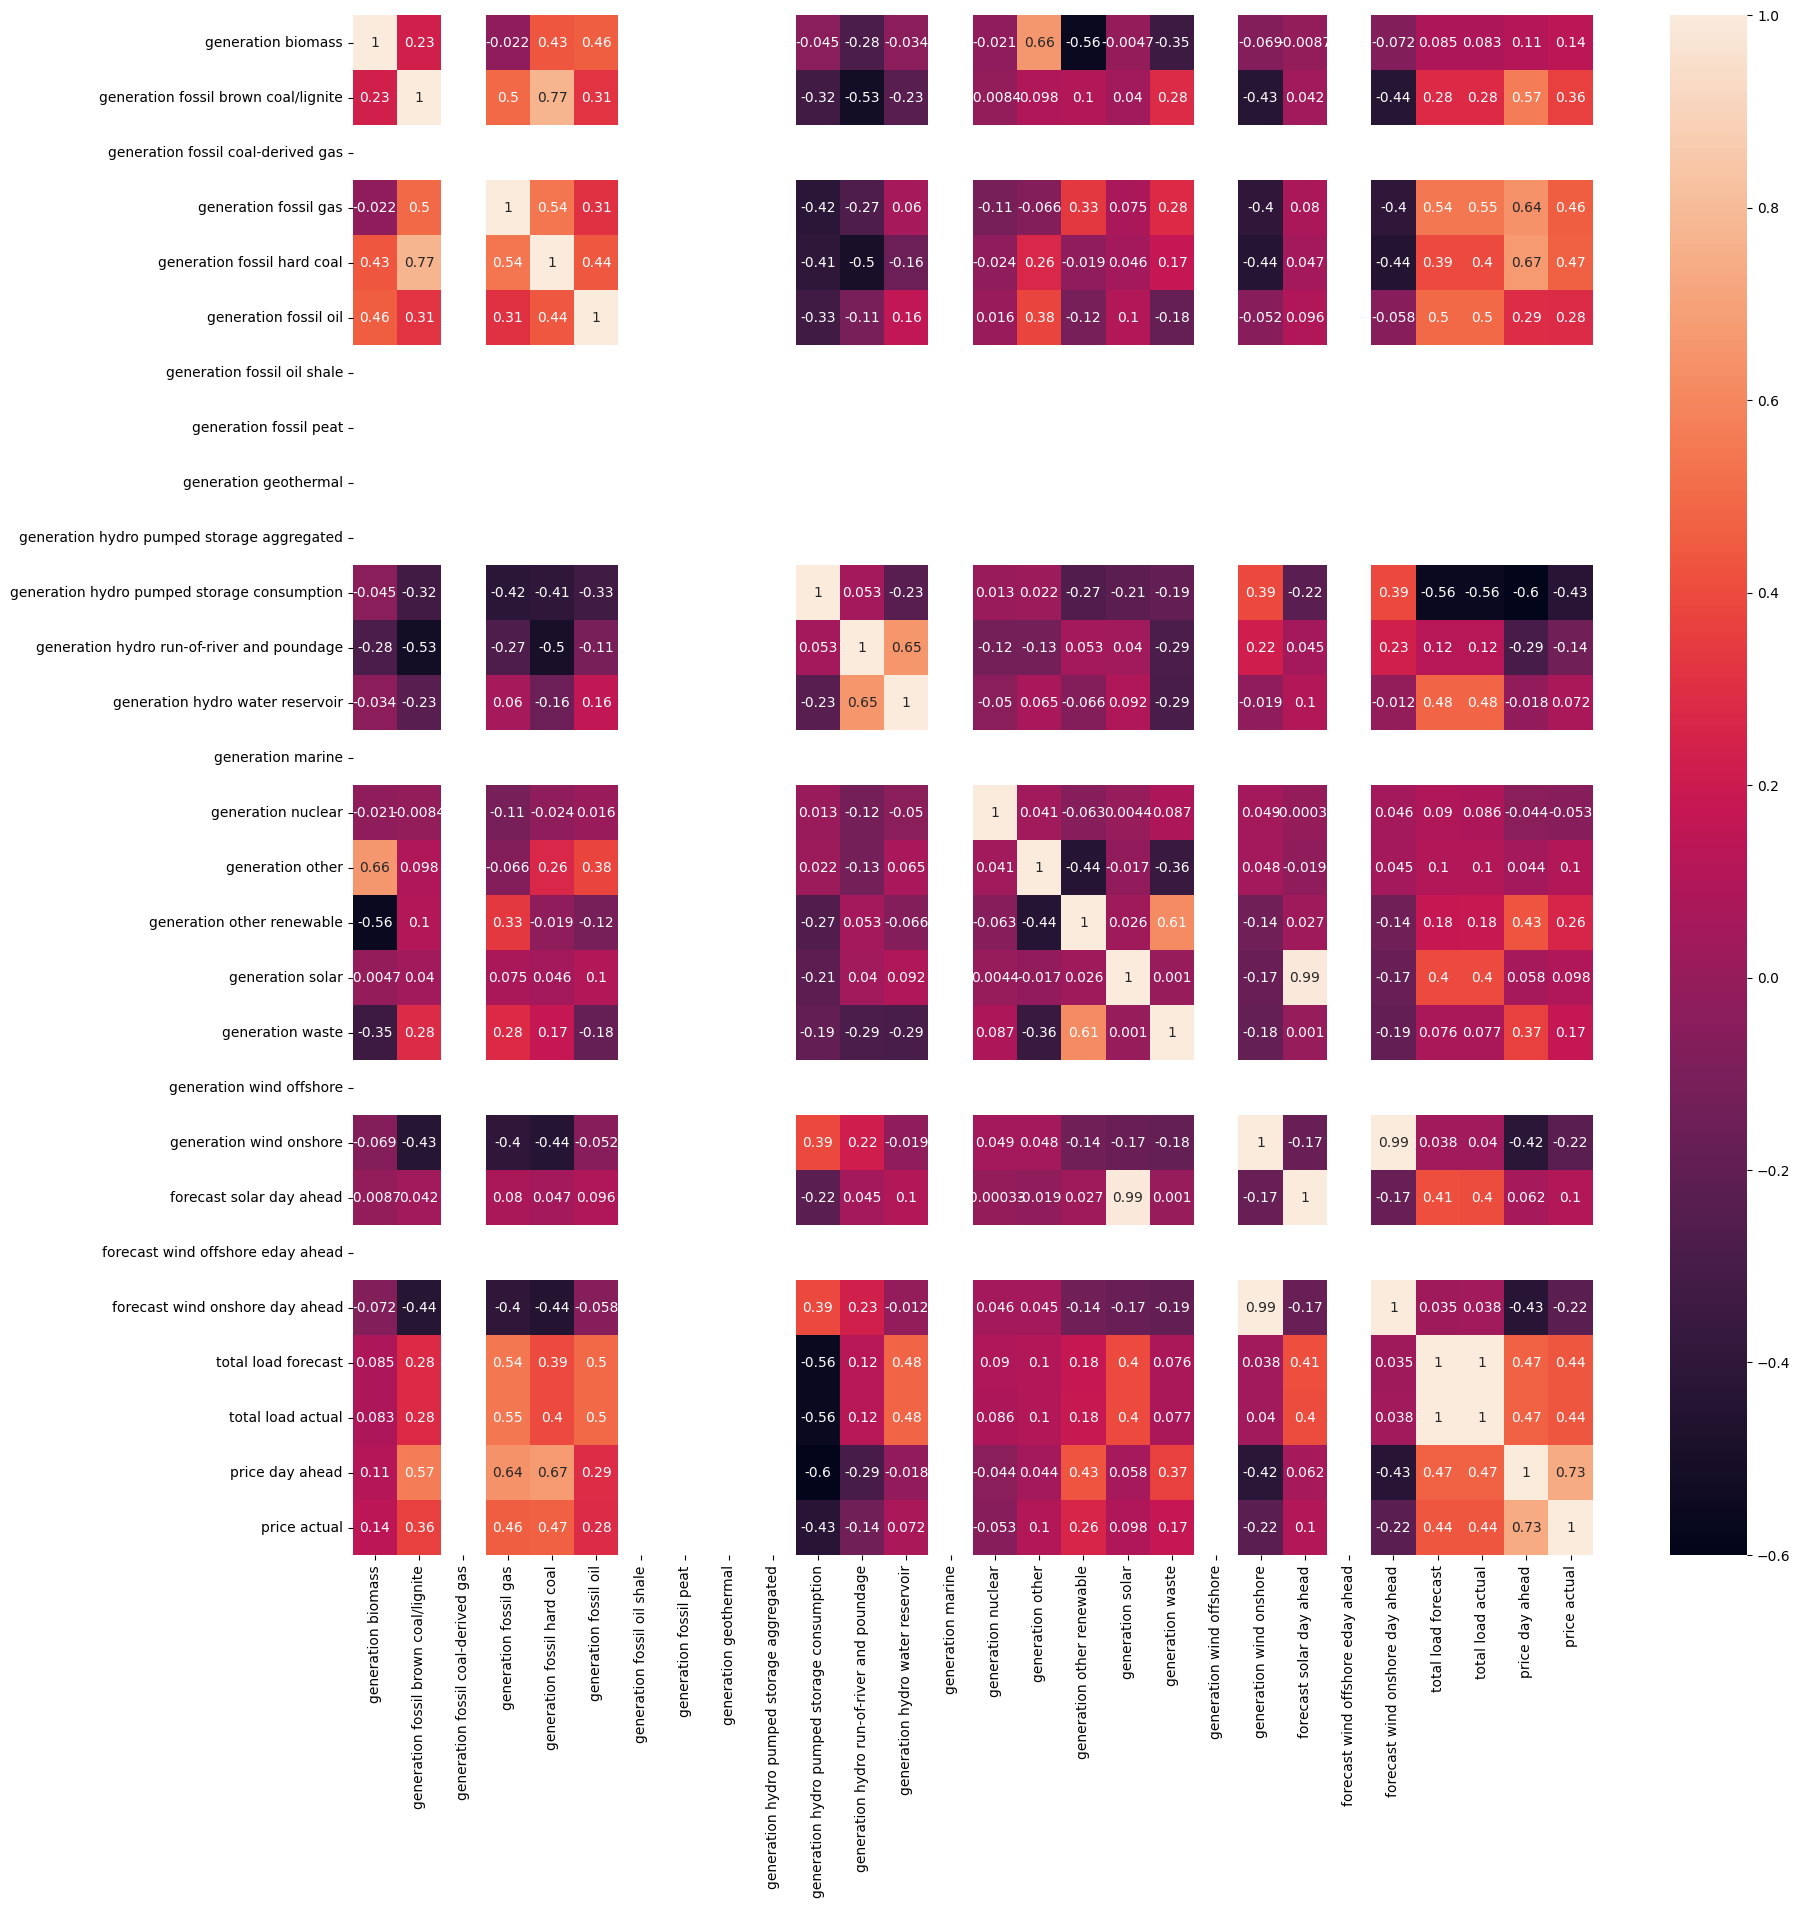

In [37]:
mat = energy_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(mat, annot=True)
#initial correlation matrix has a lot of gaps due to columns that are all zeros

In [38]:
# new df that drops a lot of stuff thats just zeros everywhere (it makes the heatmap look nicer and I assume we won;t be using these values anyway)
energy_data_cleaned = energy_data.drop(['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation marine', 'generation wind offshore', 'forecast wind offshore eday ahead' ], axis=1)

<ipython-input-39-cc8df53bd602>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat = energy_data_cleaned.corr()


<Axes: >

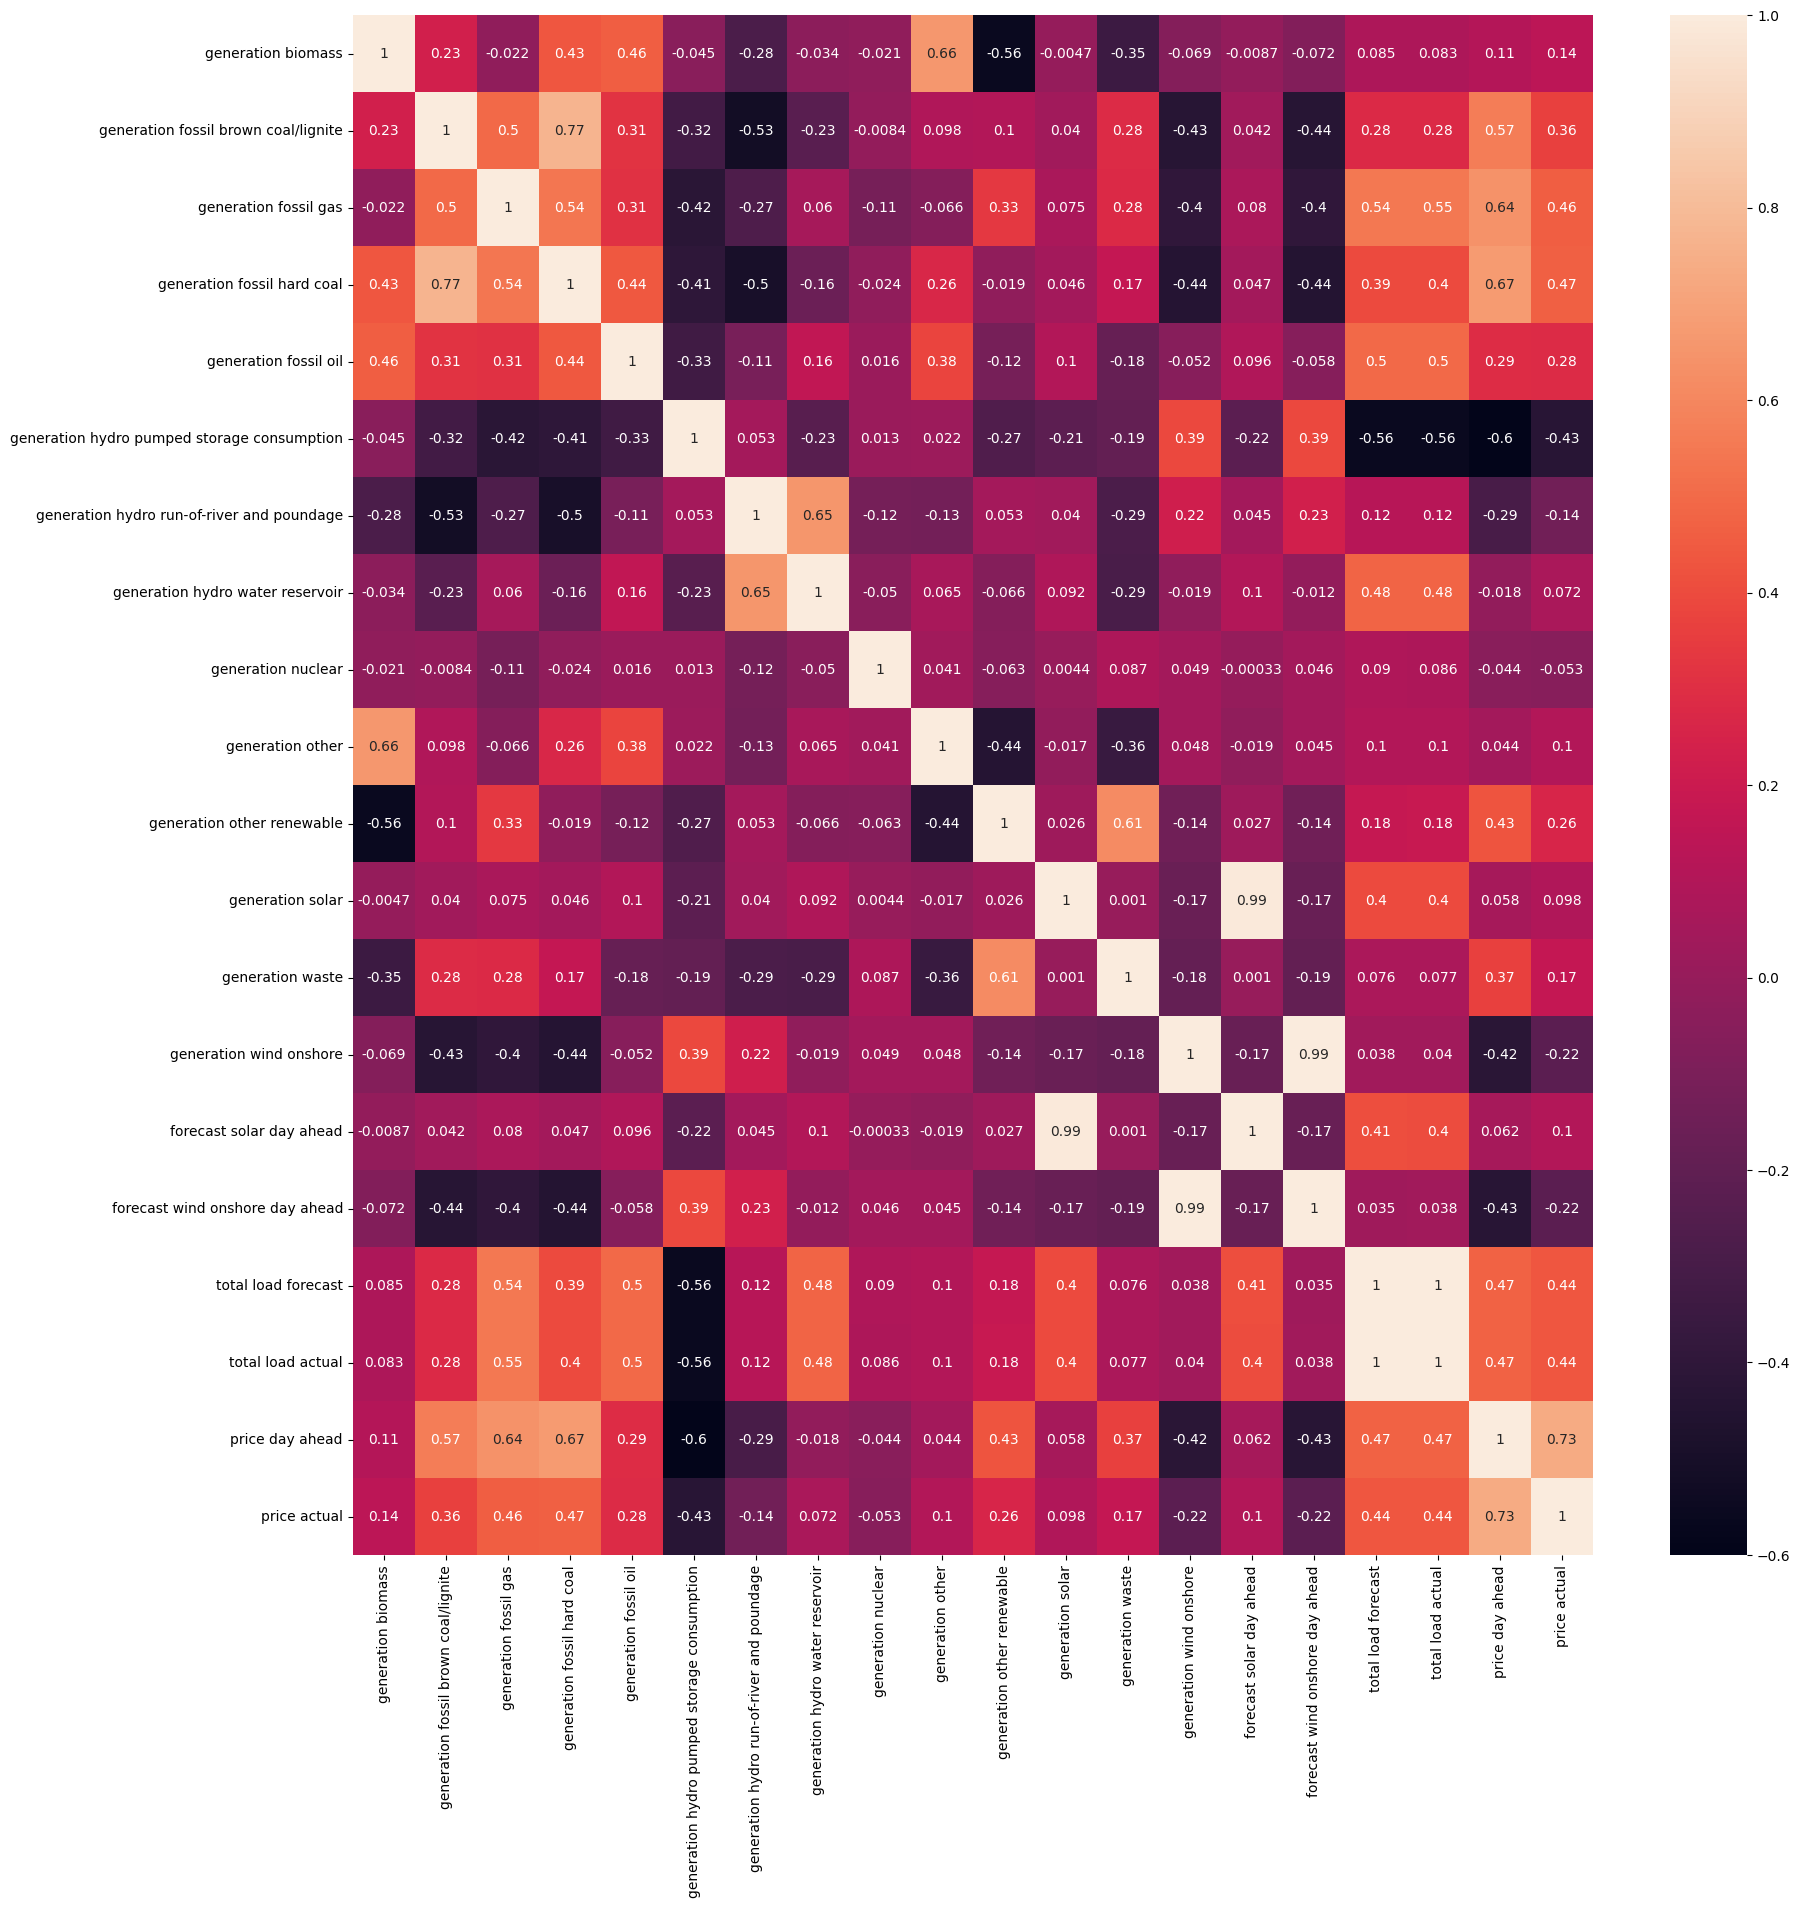

In [39]:
mat = energy_data_cleaned.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(mat, annot=True)

In [40]:
#adding a time increment column - ech row assigned a unique, incrementing number - can be used for change over time, subsetting dataframe
energy_data_cleaned_time_columns = energy_data_cleaned
energy_data_cleaned_time_columns['time increment'] = np.nan
for ind in energy_data_cleaned_time_columns.index:
    energy_data_cleaned_time_columns['time increment'][ind] = ind
energy_data_cleaned_time_columns.tail()

<ipython-input-40-0664b9fe9831>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_data_cleaned_time_columns['time increment'][ind] = ind


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,time increment
35059,2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02,35059.0
35060,2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16,35060.0
35061,2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30,35061.0
35062,2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89,35062.0
35063,2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,...,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88,35063.0


In [41]:
#cleans up time column a bit - eliminates information useless to us
for ind in energy_data_cleaned_time_columns.index:
    energy_data_cleaned_time_columns['time'][ind] = energy_data_cleaned_time_columns['time'][ind][0:16]
energy_data_cleaned_time_columns.tail()

<ipython-input-41-607bdf93d3a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_data_cleaned_time_columns['time'][ind] = energy_data_cleaned_time_columns['time'][ind][0:16]


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,time increment
35059,2018-12-31 19:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02,35059.0
35060,2018-12-31 20:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16,35060.0
35061,2018-12-31 21:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30,35061.0
35062,2018-12-31 22:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89,35062.0
35063,2018-12-31 23:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,...,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88,35063.0


In [53]:
# adds a column containing 1 if row is at midnight, 0 if not - can be used for subsetting graph to find changes in different times of day
# proof of concept, can create others based on this
energy_data_cleaned_time_columns['midnight'] = np.nan
for ind in energy_data_cleaned_time_columns.index:
    if energy_data_cleaned_time_columns['time increment'][ind] % 24 == 0:
       energy_data_cleaned_time_columns['midnight'][ind] = 1
    else:
       energy_data_cleaned_time_columns['midnight'][ind] = 0
energy_data_cleaned_time_columns.head(26)

<ipython-input-53-b0141ade94c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_data_cleaned_time_columns['midnight'][ind] = 1
<ipython-input-53-b0141ade94c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_data_cleaned_time_columns['midnight'][ind] = 0


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,time increment,midnight
0,2015-01-01 00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,0.0,1.0
1,2015-01-01 01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,1.0,0.0
2,2015-01-01 02:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,2.0,0.0
3,2015-01-01 03:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,3.0,0.0
4,2015-01-01 04:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,4.0,0.0
5,2015-01-01 05:00,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,...,188.0,4618.0,4.0,4617.0,21441.0,19905.0,35.72,53.63,5.0,0.0
6,2015-01-01 06:00,401.0,172.0,4040.0,3368.0,158.0,2108.0,961.0,848.0,7098.0,...,186.0,4397.0,3.0,4276.0,21285.0,20010.0,35.13,51.73,6.0,0.0
7,2015-01-01 07:00,408.0,172.0,4030.0,3208.0,160.0,2031.0,983.0,1012.0,7099.0,...,189.0,3992.0,12.0,3994.0,21545.0,20377.0,36.22,51.43,7.0,0.0
8,2015-01-01 08:00,413.0,177.0,4052.0,3335.0,161.0,2119.0,1001.0,1015.0,7098.0,...,198.0,3629.0,39.0,3602.0,21443.0,20094.0,32.40,48.98,8.0,0.0
9,2015-01-01 09:00,419.0,177.0,4137.0,3437.0,163.0,2170.0,1041.0,1357.0,7097.0,...,198.0,3073.0,784.0,3212.0,21560.0,20637.0,36.60,54.20,9.0,0.0


In [57]:
# adds a column containing 1 if row is in January, 0 if not - can be used for subsetting graph to find changes between months - could also use to create columns for seasons
# proof of concept, can create others based on this
energy_data_cleaned_time_columns['January'] = np.nan
for ind in energy_data_cleaned_time_columns.index:
    if energy_data_cleaned_time_columns['time'][ind][5:7] == '01':
       energy_data_cleaned_time_columns['January'][ind] = 1
    else:
       energy_data_cleaned_time_columns['January'][ind] = 0
energy_data_cleaned_time_columns.head()

<ipython-input-57-cb566f47ae70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_data_cleaned_time_columns['January'][ind] = 1
<ipython-input-57-cb566f47ae70>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_data_cleaned_time_columns['January'][ind] = 0


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,time increment,midnight,January
0,2015-01-01 00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,0.0,1.0,1.0
1,2015-01-01 01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,1.0,0.0,1.0
2,2015-01-01 02:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,2.0,0.0,1.0
3,2015-01-01 03:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,3.0,0.0,1.0
4,2015-01-01 04:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,4.0,0.0,1.0
